In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Preprocessed_data.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age,Python,R,SQL,Spark,AWS,Tableau,Excel,Categorized_title,Seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,0,1,1,Data Scientist,NaN
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,0,0,Data Scientist,NaN
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,1,0,0,1,Data Scientist,NaN
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,0,0,Data Scientist,NaN
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,1,0,0,0,1,Data Scientist,NaN


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employeer_provided_salary', 'Min_salary',
       'Max_salary', 'Avg_salary', 'Company', 'State', 'Similar_state', 'Age',
       'Python', 'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'Excel',
       'Categorized_title', 'Seniority'],
      dtype='object')

In [6]:
df['Company'] = df.Company.apply(lambda x: x.replace('\n', ''))

In [7]:
df['description_length'] = df['Job Description'].apply(lambda x: len(x))
df['description_length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
622    6034
623    4774
624    2222
625    2493
626    4490
Name: description_length, Length: 627, dtype: int64

In [8]:
df['Number_of_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Number_of_Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
622    0
623    0
624    3
625    3
626    3
Name: Number_of_Competitors, Length: 627, dtype: int64

In [9]:
df['Max_salary'] = df.apply(lambda x: x.Max_salary*2 if x.Hourly_salary ==1 else x.Max_salary, axis =1)
df['Min_salary'] = df.apply(lambda x: x.Min_salary*2 if x.Hourly_salary ==1 else x.Min_salary, axis =1)

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employeer_provided_salary', 'Min_salary',
       'Max_salary', 'Avg_salary', 'Company', 'State', 'Similar_state', 'Age',
       'Python', 'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'Excel',
       'Categorized_title', 'Seniority', 'description_length',
       'Number_of_Competitors'],
      dtype='object')

In [11]:
df.dtypes

Job Title                     object
Salary Estimate               object
Job Description               object
Rating                       float64
Company Name                  object
Location                      object
Headquarters                  object
Size                          object
Founded                        int64
Type of ownership             object
Industry                      object
Sector                        object
Revenue                       object
Competitors                   object
Hourly_salary                  int64
Employeer_provided_salary      int64
Min_salary                     int64
Max_salary                     int64
Avg_salary                   float64
Company                       object
State                         object
Similar_state                  int64
Age                            int64
Python                         int64
R                              int64
SQL                            int64
Spark                          int64
A

In [12]:
df[['Rating','Avg_salary','Age','description_length','Number_of_Competitors']].corr()

,Rating,Avg_salary,Age,description_length,Number_of_Competitors
Rating,1.000000,0.008064,0.004414,-0.027596,0.009471
Avg_salary,0.008064,1.000000,0.019006,0.067795,0.083412
Age,0.004414,0.019006,1.000000,0.141671,0.116400
description_length,-0.027596,0.067795,0.141671,1.000000,0.106796
Number_of_Competitors,0.009471,0.083412,0.116400,0.106796,1.000000


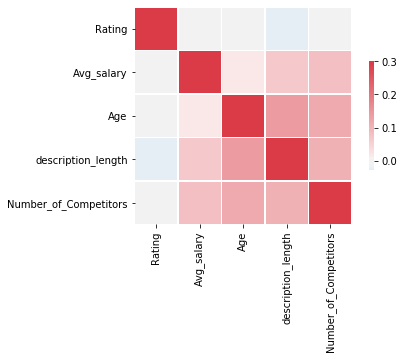

In [13]:
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(df[['Rating','Avg_salary','Age','description_length','Number_of_Competitors']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employeer_provided_salary', 'Min_salary',
       'Max_salary', 'Avg_salary', 'Company', 'State', 'Similar_state', 'Age',
       'Python', 'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'Excel',
       'Categorized_title', 'Seniority', 'description_length',
       'Number_of_Competitors'],
      dtype='object')

In [15]:
df_viz=df[['Categorized_title','Seniority','State','Headquarters','Rating','Size', 'Type of ownership', 'Industry','Sector', 'Revenue','Age',
       'Python', 'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'Excel']]

Graph of Categorized_title: amount of samples taken into consideration  = 6


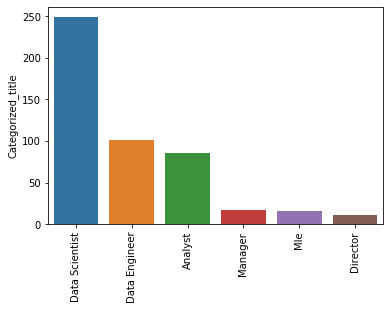

Graph of Seniority: amount of samples taken into consideration  = 2


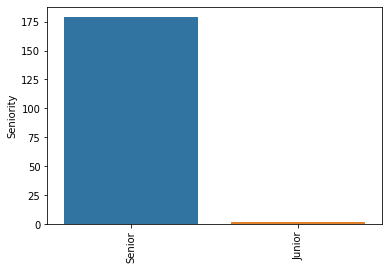

Graph of State: amount of samples taken into consideration  = 37


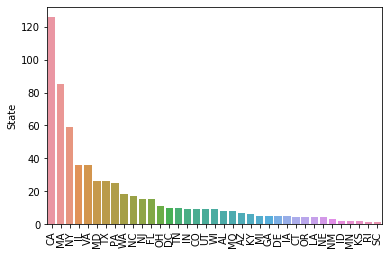

Graph of Headquarters: amount of samples taken into consideration  = 191


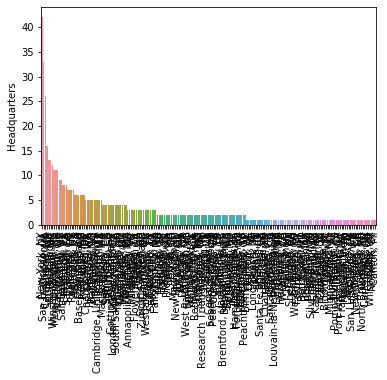

Graph of Rating: amount of samples taken into consideration  = 31


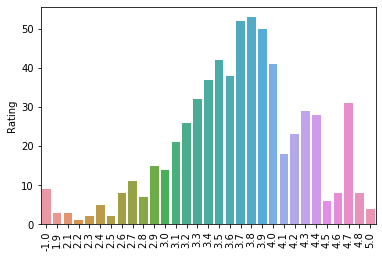

Graph of Size: amount of samples taken into consideration  = 9


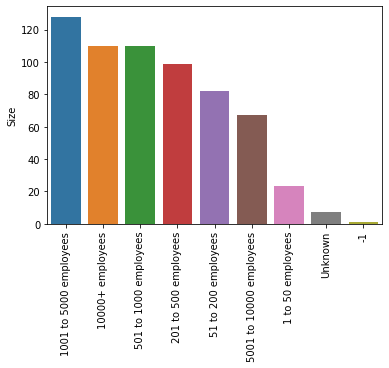

Graph of Type of ownership: amount of samples taken into consideration  = 11


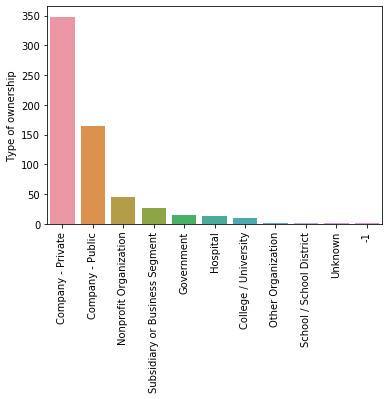

Graph of Industry: amount of samples taken into consideration  = 59


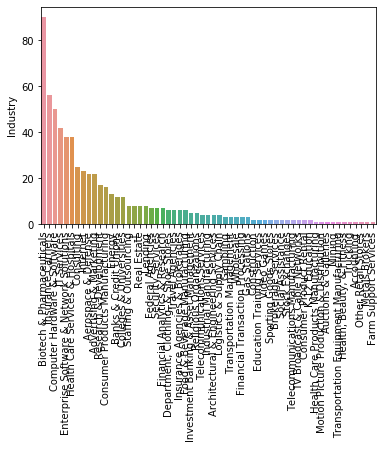

Graph of Sector: amount of samples taken into consideration  = 25


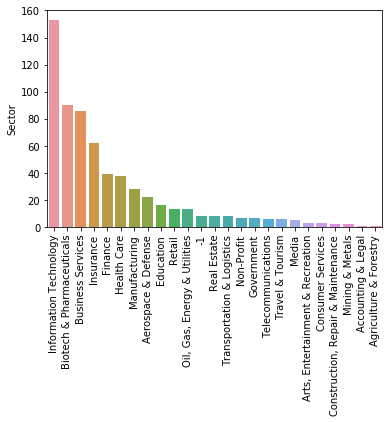

Graph of Revenue: amount of samples taken into consideration  = 14


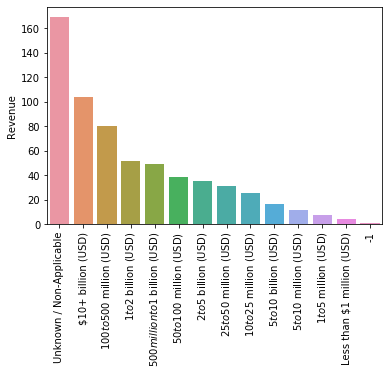

Graph of Age: amount of samples taken into consideration  = 99


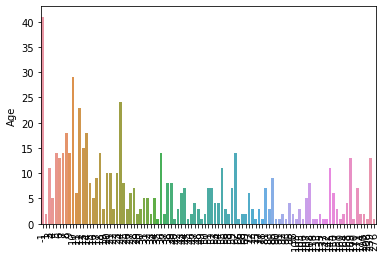

Graph of Python: amount of samples taken into consideration  = 2


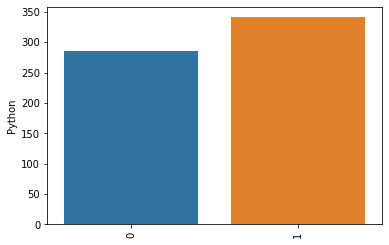

Graph of R: amount of samples taken into consideration  = 2


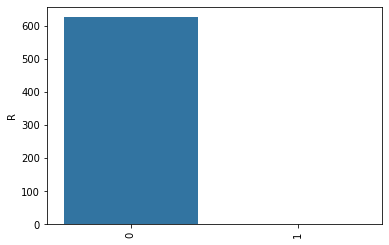

Graph of SQL: amount of samples taken into consideration  = 2


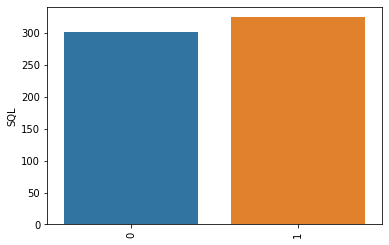

Graph of Spark: amount of samples taken into consideration  = 2


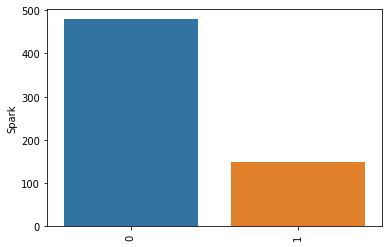

Graph of AWS: amount of samples taken into consideration  = 2


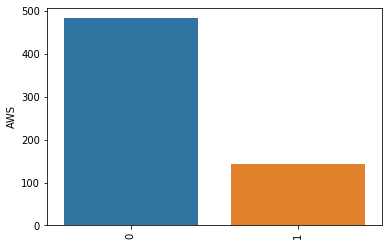

Graph of Tableau: amount of samples taken into consideration  = 2


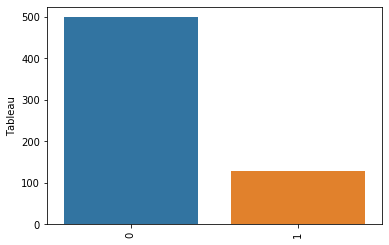

Graph of Excel: amount of samples taken into consideration  = 2


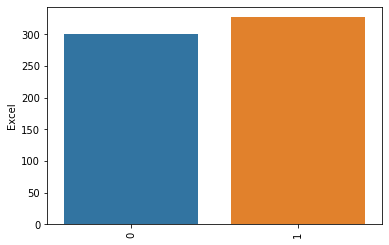

In [16]:
for viz in df_viz.columns:
    n = df_viz[viz].value_counts()
    print("Graph of %s: amount of samples taken into consideration  = %d" % (viz, len(n)))
    chart_created = sns.barplot(x=n.index, y=n)
    chart_created.set_xticklabels(chart_created.get_xticklabels(), rotation=90)
    plt.show()

Graph of Age: amount of samples taken into consideration  = 40


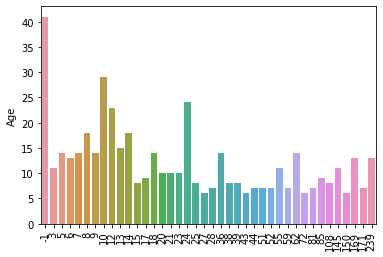

Graph of Industry: amount of samples taken into consideration  = 40


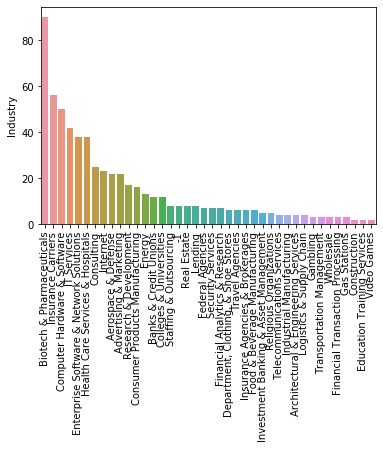

Graph of Headquarters: amount of samples taken into consideration  = 40


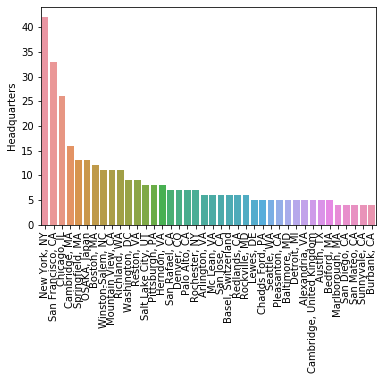

In [17]:
for viz in df_viz[['Age','Industry','Headquarters']].columns:
    n = df_viz[viz].value_counts()[:40]
    print("Graph of %s: amount of samples taken into consideration  = %d" % (viz, len(n)))
    chart_created = sns.barplot(x=n.index, y=n)
    chart_created.set_xticklabels(chart_created.get_xticklabels(), rotation=90)
    plt.show()

In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employeer_provided_salary', 'Min_salary',
       'Max_salary', 'Avg_salary', 'Company', 'State', 'Similar_state', 'Age',
       'Python', 'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'Excel',
       'Categorized_title', 'Seniority', 'description_length',
       'Number_of_Competitors'],
      dtype='object')

In [18]:
pd.pivot_table(df,index=['Age','Seniority'],values='Avg_salary').sort_values('Age', ascending = False)

,,Avg_salary
Age,Seniority,
239,Senior,151.000000
190,Senior,84.500000
171,Senior,167.500000
169,Senior,136.333333
168,Senior,146.500000
157,Senior,139.000000
150,Senior,140.500000
145,Senior,92.700000
137,Junior,50.000000


In [45]:
pd.pivot_table(df,index=['Categorized_title'],values='Avg_salary').sort_values('Avg_salary', ascending = False)

,Avg_salary
Categorized_title,
Director,172.000000
Mle,133.750000
Data Scientist,118.060241
Data Engineer,105.643564
Manager,84.147059
Analyst,65.011628


In [19]:
pd.pivot_table(df,index=['Age','description_length'],values='Avg_salary').sort_values('Avg_salary', ascending = False)[:20]

,,Avg_salary
Age,description_length,
108,4471,254.0
85,3301,237.5
21,3855,232.5
3,1632,225.0
9,4951,221.5
10,4037,205.0
108,3935,194.5
14,4847,194.0
62,7286,184.5


In [20]:
pd.pivot_table(df,index=['State','Categorized_title'],values='Avg_salary').sort_values('State', ascending = False)[:10]

Avg_salary
State Categorized_title            
WI    Data Scientist     113.500000
      Analyst             58.833333
WA    Data Scientist     102.666667
      Analyst             59.500000
VA    Mle                 87.000000
      Data Scientist     108.312500
      Data Engineer       98.666667
      Analyst             71.583333
UT    Data Engineer      100.333333
      Analyst             56.333333

In [21]:
pd.pivot_table(df,index=['Categorized_title','State'],values='Avg_salary').sort_values('State', ascending = False)[:10]

Avg_salary
Categorized_title State            
Data Scientist    WI     113.500000
Analyst           WI      58.833333
Data Scientist    WA     102.666667
Analyst           WA      59.500000
Mle               VA      87.000000
Data Scientist    VA     108.312500
Data Engineer     VA      98.666667
Analyst           VA      71.583333
                  UT      56.333333
Data Scientist    UT     140.500000

In [22]:
pd.pivot_table(df,index=['Revenue'],values='Avg_salary').sort_values('Avg_salary', ascending = False)[:10]

,Avg_salary
Revenue,
$5 to $10 million (USD),128.375000
$1 to $5 million (USD),119.312500
-1,117.500000
$10+ billion (USD),115.995192
Less than $1 million (USD),108.625000
Unknown / Non-Applicable,104.727811
$1 to $2 billion (USD),104.298077
$10 to $25 million (USD),103.442308
$50 to $100 million (USD),102.730769


In [23]:
df.to_csv('Input_Data_For_Model.csv', index=False)